## Program #2: Benchmarking Insertion and Selection Sorts
Catherine Mett, Noah Nieberle, Dominic Palermo


#### Introduction
In this assignment, we implemented the insertion and selection sorts discussed in class. We then ran some tests and benchmarked these algorithms to show correctness and the difference between their runtimes when given best, worst and average case scenarios. Graphs of these runtimes are shown in the analysis of the results. 

#### Algorithm Implementations
##### Insertion sort

In [301]:
def insertion_sort(arr):
    """
    Sorts array of integers using the insertion sort algorithm
    :param arr: an array to be sorted
    """
    for i in range(1,len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:  
            arr[j+1] = arr[j]  
            j -= 1
        arr[j+1] = key 

##### Selection Sort

In [302]:
def selection_sort(arr):
    """
    Sorts array of integers using the selection sort algorithm
    :param arr: an array to be sorted
    """
    for j in range(0, len(arr)-1):
        smallest = j
        for i in range(j+1, len(arr)):
            if arr[i] < arr[smallest]:
                smallest = i
        temp = arr[j]
        arr[j] = arr[smallest]
        arr[smallest] = temp

#### Algorithm Tests

In [303]:
test1 = [12, 11, 13, 5, 6,324,36,-3,423]
test2 = [-300, 0, -232, 8, -459, -5, 21, 60, 59, -301]
test3 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
insertion_sort(test1)
insertion_sort(test2)
insertion_sort(test3)
print("Insertion Sort:")
print(test1)
print(test2)
print(test3)

test1 = [12, 11, 13, 5, 6,324,36,-3,423]
test2 = [-300, 0, -232, 8, -459, -5, 21, 60, 59, -301]
test3 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
selection_sort(test1)
selection_sort(test2)
selection_sort(test3)
print("\nSelection Sort:")
print(test1)
print(test2)
print(test3)

Insertion Sort:
[-3, 5, 6, 11, 12, 13, 36, 324, 423]
[-459, -301, -300, -232, -5, 0, 8, 21, 59, 60]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Selection Sort:
[-3, 5, 6, 11, 12, 13, 36, 324, 423]
[-459, -301, -300, -232, -5, 0, 8, 21, 59, 60]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### Benchmarking

In [304]:
import time
import random
import matplotlib.pyplot as plt
import statistics

def benchmark(sorting_algorithm, input_list):
    """
    Performs 3 tests on the sorting algorithm given an input list, where the input is shuffled, sorted, and reversed
    Return: Average of 5 benchmark times for each algorithm on an input list
    """
    shuffle_input_list = input_list.copy()
    #Shuffled list
    random.shuffle(shuffle_input_list)
    start_time = time.perf_counter()
    sorting_algorithm(shuffle_input_list)
    shuffled_benchmark_time = time.perf_counter() - start_time
    print("shuffled list")
    
    sort_input_list = input_list.copy()
    #Sorted List
    sort_input_list.sort()
    start_time = time.perf_counter()
    sorting_algorithm(sort_input_list)
    sorted_benchmark_time = time.perf_counter() - start_time
    print("sorted list")
    
    reverse_input_list = input_list.copy()
    #Reversed List
    reverse_input_list.sort(reverse=True)
    start_time = time.perf_counter()
    sorting_algorithm(reverse_input_list)
    reversed_benchmark_time = time.perf_counter() - start_time
    print("reversed list")
    return (shuffled_benchmark_time, sorted_benchmark_time, reversed_benchmark_time)

def generate_input_list(n):
    return [random.randint(0,100) for _ in range(n)]

list_sizes = [10,50,250,1250,6250,31250,156250]

#Lists to hold the benchmark times for each algorithm
sorted_times_insertion = []
shuffled_times_insertion = []
reversed_times_insertion = []
sorted_times_selection = []
shuffled_times_selection = []
reversed_times_selection = []
trial_count = 3
for list_size in list_sizes:
    #Lists will hold the benchmark times for sorting of size n
    selection_shuffled_times = []
    selection_sorted_times = []
    selection_reversed_times = []
    insertion_shuffled_times = []
    insertion_sorted_times = []
    insertion_reversed_times = []
    for trial in range(trial_count):
        #Data is randomly generated
        data = generate_input_list(list_size)
        #Selection sort
        benchmark_times_ss = benchmark(selection_sort, data)

        shuffled_time_ss = benchmark_times_ss[0]
        sorted_time_ss = benchmark_times_ss[1]
        reversed_time_ss = benchmark_times_ss[2]

        selection_shuffled_times.append(shuffled_time_ss)
        selection_sorted_times.append(sorted_time_ss)
        selection_reversed_times.append(reversed_time_ss)

        #Insertion Sort
        benchmark_times_is = benchmark(insertion_sort, data)

        shuffled_time_is = benchmark_times_is[0]
        sorted_time_is = benchmark_times_is[1]
        reversed_time_is = benchmark_times_is[2]

        #Times for insertion sort with list size N
        insertion_shuffled_times.append(shuffled_time_is)
        insertion_sorted_times.append(sorted_time_is)
        insertion_reversed_times.append(reversed_time_is)
        print(trial)

    #The average time of selection sort algorithm for sorted, shuffled, and reversed input lists of size n
    selection_sorted_average_time = statistics.fmean(selection_sorted_times)
    selection_shuffled_average_time = statistics.fmean(selection_shuffled_times)
    selection_reversed_average_time = statistics.fmean(selection_reversed_times)

    #The average time of insertion sort algorithm for sorted, shuffled, and reversed input lists of size n
    insertion_sorted_average_time = statistics.fmean(insertion_sorted_times)
    insertion_shuffled_average_time = statistics.fmean(insertion_shuffled_times)
    insertion_reversed_average_time = statistics.fmean(insertion_reversed_times)

    sorted_times_selection.append(selection_sorted_average_time)
    shuffled_times_selection.append(selection_shuffled_average_time)
    reversed_times_selection.append(selection_reversed_average_time)

    sorted_times_insertion.append(insertion_sorted_average_time)
    shuffled_times_insertion.append(insertion_shuffled_average_time)
    reversed_times_insertion.append(insertion_reversed_average_time)
    print(list_size)

shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
10
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
50
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
250
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
0
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
1
shuffled list
sorted list
reversed list
shuffled list
sorted list
reversed list
2
1250
s

### Validating Formal Run Times

In [305]:
# import numpy as np
# from scipy.stats import linregress
# m, b = linregress(np.log())

#### Comparison of Algorithm Run Times

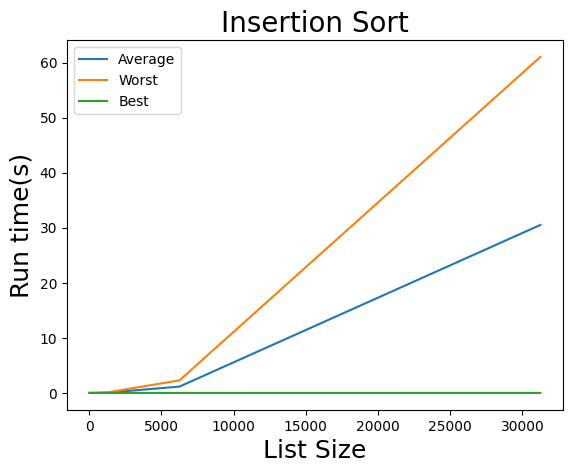

In [306]:
plt.plot(list_sizes, shuffled_times_insertion, label="Average")
plt.plot(list_sizes, reversed_times_insertion, label="Worst")
plt.plot(list_sizes, sorted_times_insertion, label="Best")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Insertion Sort", fontsize=20)
plt.legend()

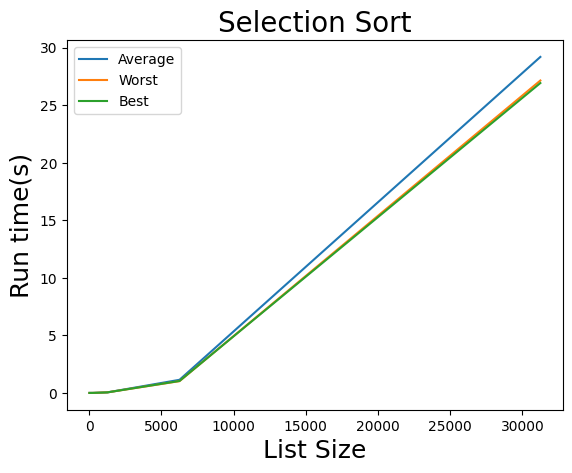

In [307]:
plt.plot(list_sizes, shuffled_times_selection, label="Average")
plt.plot(list_sizes, reversed_times_selection, label="Worst")
plt.plot(list_sizes, sorted_times_selection, label="Best")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Selection Sort", fontsize=20)
plt.legend()

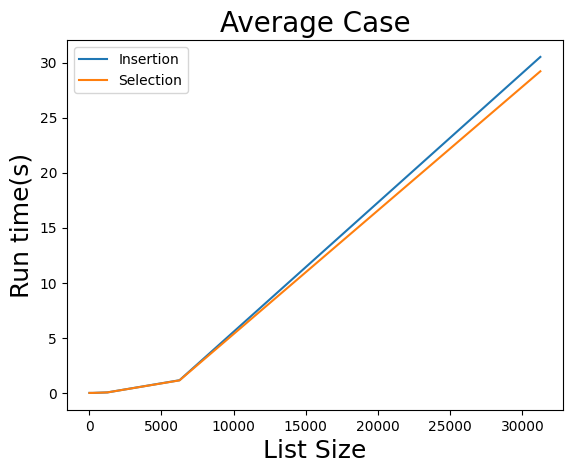

In [313]:
plt.plot(list_sizes, shuffled_times_insertion, label="Insertion")
plt.plot(list_sizes, shuffled_times_selection, label="Selection")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Average Case", fontsize=20)
plt.legend()

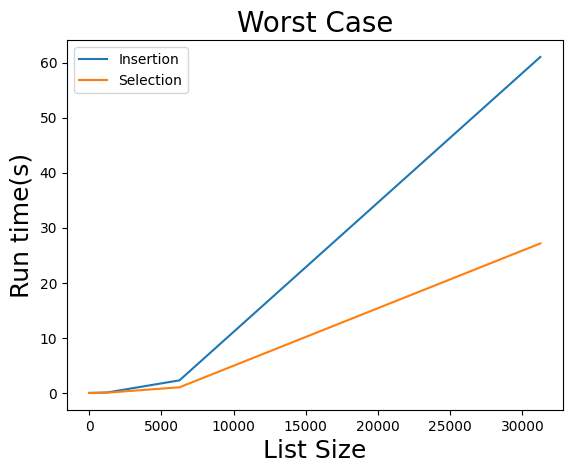

In [312]:
plt.plot(list_sizes, reversed_times_insertion, label="Insertion")
plt.plot(list_sizes, reversed_times_selection, label="Selection")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Worst Case", fontsize=20)
plt.legend()

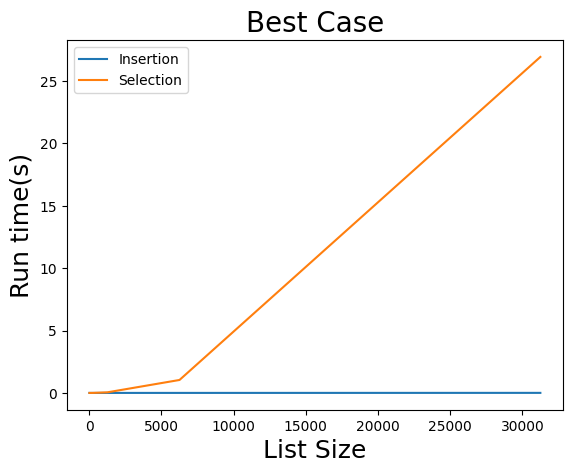

In [311]:
plt.plot(list_sizes, sorted_times_insertion, label="Insertion")
plt.plot(list_sizes, sorted_times_selection, label="Selection")

plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run time(s)", fontsize=18)
plt.title("Best Case", fontsize=20)
plt.legend()

#### Reflection Questions
1. Create a table with theoretical and estimated run times. Do your estimates match the theory? 

|                            |        Theoretical Run Time        | Estimated Run Time |
|----------------------------|:----------------------------------:|:------------------:|
| insertionSort best case    | T(n) = 5n - 3                      |                    |
| insertionSort average case | T(n) = (3/4)n^2 + (19/4)n - 3      |                    |
| insertionSort worst case   | T(n) = 3n^2 + 2n - 3               |                    |
| selectionSort best case    | T(n) = (3/2)n^2 + (3/2)n + 3       |                    |
| selectionSort average case | T(n) = (1/7)n^2 + (1/7)n + (53/49) |                    |
| selectionSort worst case   | T(n) = 2n^2 + 2n + 1               |                    |


2. Insertion sort has the best runtime, and was substantially faster in the Best Case scenario.  This is because all the numbers were already sorted and never entered the inner while loop, saving a lot of time. This is supported by the theoretical best case run time for insertion sort in the table above, as O(n) < O(n^2^).
   Selection sort had the best runtimes for Worst case and Average case. Although all the theoretical runtimes are in O(n^2^) for all average and worst cases, the n^2^ is multiplied by different numbers. Insertion sort's n^2^ multiplier is slightly higher than selection sort's, resulting in a slightly longer runtime for both average and worst cases. This is depicted in the graphs previously shown.

3. If the list is partially sorted already and relatively small, it seems best to use the insertion sort algorithm. The run time is much lower than the selection sort. If the list is all out of order, selection sort should be used. Even though the selection sort always has a run time of O(n^2^), in the very worst case, the runtime algorithm starts with 2n^2^, whereas in the insertion sort's worst case starts with 3n^2^. This is a significant difference, as shown in the Worst Case graph above. Even the average case graph above shows insertion sort to take a bit longer than selection sort, and this is supported by the theoretical runtimes starting with 3/4n^2^ vs 1/7n^2^.